Data Acquisition

In [53]:
# Realizamos la importaciones que necesitaremos a lo largo del proyecto

import numpy as np
import pandas as pd
import re
import seaborn as sns
import argparse


In [54]:
# Importamos el archivo csv

dfApp = pd.read_csv('googleplaystore.csv', encoding = "utf-8")
dfReview = pd.read_csv('googleplaystore_user_reviews.csv', encoding = "utf-8")
dfApp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
dfApp.dtypes
len(dfApp)

10841

DATA CLEANING

In [56]:

dfApp = dfApp.drop_duplicates()
len(dfApp)

10358

In [57]:
# No es necesario manipular 'rating'
# Convertmos a MB todas las medidas de 'Size'.

def toMb(x):
    if 'M' in str(x):
        return str(x).replace('M', '')
    elif 'k' in str(x):
        return float(str(x).replace('k', '')) / 1000
    else:
        return str(x).replace('Varies with device', 'NaN')
 



dfApp['Size'] = dfApp['Size'].apply(lambda x: toMb(x))
dfApp.loc[(dfApp['Size']== '1,000+', 'Size')] = str(1)
dfApp['Size'] = dfApp['Size'].apply(lambda x: float(x))

In [58]:
#Manipulamos la columna de 'Installs'
dfApp['Installs'] = dfApp['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
dfApp['Installs'] = dfApp['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
dfApp['Installs'] = dfApp['Installs'].apply(lambda x: x.replace('Free', '0') if 'Free' in str(x) else x)
dfApp['Installs'] = dfApp['Installs'].apply(lambda x: int(x))
dfApp['Installs'] = dfApp['Installs'].apply(lambda x: float(x))


In [59]:
#Manipulamos la columna de 'Price'
dfApp['Price'] = dfApp['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
dfApp['Price'] = dfApp['Price'].apply(lambda x: x.replace('Everyone', '0') if 'Everyone' in str(x) else x)
dfApp['Price'] = dfApp['Price'].apply(lambda x: float(x))

In [60]:
#Manipulamos la columna de 'Reviews'
dfApp['Reviews'] = dfApp['Reviews'].apply(lambda x: x.replace('3.0M', '3') if '3.0M' in str(x) else x)

dfApp['Reviews'] = dfApp['Reviews'].apply(lambda x: int(x))

In [61]:
#Comprobamos que los datos son del tipo necesario para operar con ellos
dfApp.dtypes


App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [62]:
#Pedimos las columnas a comparar

def toInput():
    #ask for the column to compare

    print('Elige el par de elementos que quieres comparar')
    try:
        opciones = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
        col1 = input('Choose the first: Rating, Reviews, Size, Installs or Price: ')
        if col1 in opciones: 
            print("Correct!!")  

        else:
            raise ValueError ("It looks bad! Try again")

        col2 = input('Choose the second: Rating, Reviews, Size, Installs or Price: ')   
        if col2 in opciones:
            print("Correct!!")
            print(col2)
        else:
            raise ValueError ("It looks bad! Try again") 

    except:
        print ("INCORRECT input")


    return dfApp[col1].corr(dfApp[col2])
toInput()

Elige el par de elementos que quieres comparar
Choose the first: Rating, Reviews, Size, Installs or Price: Price
Correct!!
Choose the second: Rating, Reviews, Size, Installs or Price: Installs
Correct!!
Installs


-0.011145637364152486

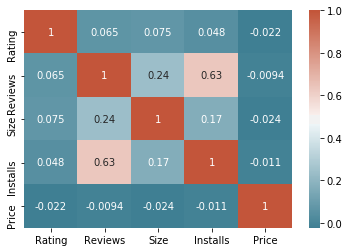

In [63]:
#Partíamos de la hipótesis que el Rating de las Apps estaba relacionado con su Size.
# Aplicamos la correlación entre ambas columnas y comprobamos que la hipótesis es errónea.
# Como refleja el siguiente gráfico:

#f, ax = plt.subplots()
corrmat = dfApp.corr()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [64]:
# ¿A qué categoría de aplicaciones dedica mayor número de estas?

category_market = dfApp['Category'].value_counts().sort_values(ascending=False)


In [65]:
# ¿Cuál es el rating promedio de las aplicaciones?


np.mean(dfApp['Rating'])

4.189542336669291

In [66]:
# Correlación máxima: solo la relación entre instalaciones y reviews muesta una correlación positiva.
max_cor = dfApp['Installs'].corr(dfApp['Reviews'])


In [67]:
# ¿Cuántas categorías de aplicaciones hay?

print(len(dfApp['Category'].unique()) , "categories")

# ¿Cuáles son las categorías?

print("\n", dfApp['Category'].unique())


34 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [73]:
#Pivotamos las columnas 'Category' y 'Type' para conocer mejor los promedios en instalaciones y rating.
table = pd.pivot_table(dfApp, values=['Rating', 'Installs'], index=['Category', 'Type'], aggfunc={'Rating': np.mean,'Installs': [min, max, np.mean]})

table

Installs                             Rating
                                   max          mean       min       mean
Category            Type                                                 
1.9                 0     0.000000e+00  0.000000e+00       0.0  19.000000
ART_AND_DESIGN      Free  5.000000e+07  2.005195e+06       0.0   4.338983
                    Paid  1.000000e+04  5.333333e+03    1000.0   4.733333
AUTO_AND_VEHICLES   Free  1.000000e+07  6.473178e+05       1.0   4.184722
                    Paid  5.000000e+04  1.671667e+04      50.0   4.600000
BEAUTY              Free  1.000000e+07  5.131519e+05      50.0   4.278571
BOOKS_AND_REFERENCE Free  1.000000e+09  9.487358e+06       5.0   4.350888
                    Paid  1.000000e+04  8.327143e+02       1.0   4.275000
BUSINESS            Free  1.000000e+08  2.080607e+06       0.0   4.103448
                    Paid  1.000000e+05  1.773125e+04       5.0   4.077778
COMICS              Free  1.000000e+07  9.347692e+05      50.0   4.155172
COMMUNICATION       Free  1.000000e+09  7.124164e+07       1.0   4.158246
                    Paid  1.000000e+06  5.037222e+04      10.0   4.063636
DATING              Free  1.000000e+07  1.092671e+06       1.0   3.980645
                    Paid  1.000000e+04  3.050000e+03      50.0   3.625000
EDUCATION           Free  1.000000e+08  4.232937e+06   10000.0   4.364000
                    Paid  5.000000e+05  1.505000e+05    1000.0   4.750000
ENTERTAINMENT       Free  1.000000e+09  2.252716e+07   10000.0   4.127523
                    Paid  1.000000e+05  1.000000e+05  100000.0   4.600000
EVENTS              Free  5.000000e+06  2.535422e+05      10.0   4.435556
                    Paid  1.000000e+00  1.000000e+00       1.0        NaN
FAMILY              Free  1.000000e+09  5.703984e+06       1.0   4.181026
                    Paid  1.000000e+07  1.668493e+05       0.0   4.291139
FINANCE             Free  1.000000e+08  2.245374e+06       1.0   4.140132
                    Paid  1.000000e+05  1.091776e+04       0.0   3.830769
FOOD_AND_DRINK      Free  1.000000e+07  2.113432e+06       1.0   4.160577
                    Paid  5.000000e+04  3.000000e+04   10000.0   4.350000
GAME                Free  1.000000e+09  3.036891e+07       5.0   4.274223
                    Paid  1.000000e+07  2.542164e+05       1.0   4.372727
HEALTH_AND_FITNESS  Free  5.000000e+08  4.675424e+06       1.0   4.255777
...                                ...           ...       ...        ...
LIFESTYLE           Free  1.000000e+08  1.507470e+06       1.0   4.086411
                    Paid  1.000000e+06  6.205842e+04       0.0   4.250000
MAPS_AND_NAVIGATION Free  1.000000e+08  5.486067e+06      10.0   4.059664
                    Paid  1.000000e+05  2.422000e+04     100.0   3.860000
MEDICAL             Free  5.000000e+06  1.282202e+05       1.0   4.167227
                    Paid  1.000000e+05  7.867060e+03       0.0   4.239062
NEWS_AND_MAGAZINES  Free  1.000000e+09  2.058478e+07       0.0   4.122170
                    Paid  5.000000e+03  2.750000e+03     500.0   4.800000
PARENTING           Free  1.000000e+07  5.426036e+05      10.0   4.339583
                    Paid  5.000000e+04  2.505000e+04     100.0   3.350000
PERSONALIZATION     Free  1.000000e+08  6.765477e+06       1.0   4.303689
                    Paid  1.000000e+06  5.193651e+04       0.0   4.445455
PHOTOGRAPHY         Free  1.000000e+09  3.218301e+07       5.0   4.193056
                    Paid  1.000000e+06  9.893700e+04      10.0   4.000000
PRODUCTIVITY        Free  1.000000e+09  3.288042e+07       1.0   4.201582
                    Paid  5.000000e+05  5.043054e+04       0.0   4.205556
SHOPPING            Free  1.000000e+08  1.159162e+07       5.0   4.249000
                    Paid  1.000000e+04  5.050000e+03     100.0   4.500000
SOCIAL              Free  1.000000e+09  4.517640e+07       0.0   4.259504
                    Paid  5.000000e+03  2.000000e+03       0.0   3.700000
SPORTS              Free  1.000000

In [ ]:
# Exporting DataFrame

export = dfApp.to_csv('../output/dfApp.csv', index=False)
